In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('ipl_2023_dataset.csv')
df.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [10]:
df.shape

(568, 7)

In [11]:
#renaming the columns for easy access
df.columns = ['name','base_price','type','cost_rs','cost_usd','2022_s','2023_s']

In [12]:
df.head()

,name,base_price,type,cost_rs,cost_usd,2022_s,2023_s
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        568 non-null    object 
 1   base_price  568 non-null    object 
 2   type        568 non-null    object 
 3   cost_rs     243 non-null    float64
 4   cost_usd    243 non-null    float64
 5   2022_s      230 non-null    object 
 6   2023_s      568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


In [14]:
df.isna().sum()

name            0
base_price      0
type            0
cost_rs       325
cost_usd      325
2022_s        338
2023_s          0
dtype: int64

In [15]:
df[(df['2023_s']=='Unsold') & (df.cost_rs.isna())]

,name,base_price,type,cost_rs,cost_usd,2022_s,2023_s
243,Tom Banton,20000000,WICKETKEEPER,NaN,NaN,NaN,Unsold
244,Kusal Mendis,5000000,WICKETKEEPER,NaN,NaN,NaN,Unsold
245,Chris Jordan,20000000,BOWLER,NaN,NaN,CSK,Unsold
246,Adam Milne,20000000,BOWLER,NaN,NaN,CSK,Unsold
247,Mujeeb Rahman,10000000,BOWLER,NaN,NaN,NaN,Unsold
...,...,...,...,...,...,...,...
563,Dhruv Patel,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
564,Jack Prestwidge,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
565,Aditya Sarvate,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
566,Sagar Solanki,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [16]:
df.nunique()

name          565
base_price     10
type            4
cost_rs        32
cost_usd       32
2022_s         10
2023_s         11
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        568 non-null    object 
 1   base_price  568 non-null    object 
 2   type        568 non-null    object 
 3   cost_rs     243 non-null    float64
 4   cost_usd    243 non-null    float64
 5   2022_s      230 non-null    object 
 6   2023_s      568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


### Univariate Analysis

In [19]:
print(df.base_price.value_counts())
print('converting "Retained" to 0')
df.base_price = np.where(df.base_price=='Retained',0,df.base_price).astype('float')
#convert base_price to Crores as we have cost also in crores
df.base_price = df.base_price/10000000.0
print(df.base_price.value_counts())

base_price
2000000     274
Retained    163
5000000      61
10000000     20
20000000     19
1500000      10
7500000       9
4000000       7
3000000       4
15000000      1
Name: count, dtype: int64
converting "Retained" to 0
base_price
0.20    274
0.00    163
0.50     61
1.00     20
2.00     19
0.15     10
0.75      9
0.40      7
0.30      4
1.50      1
Name: count, dtype: int64


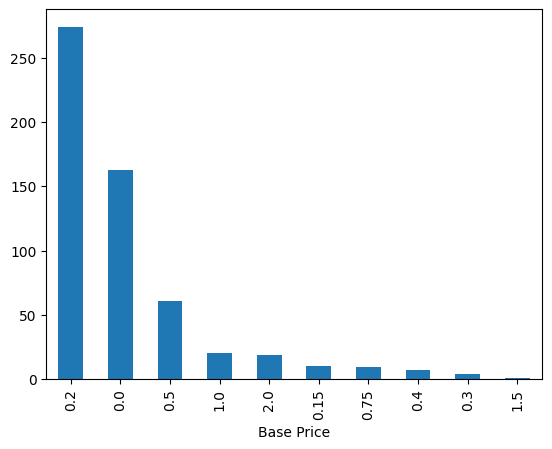

In [20]:
df.base_price.value_counts().plot(kind='bar')
plt.xlabel('Base Price')
plt.show()

In [21]:
df.type.value_counts()

type
ALL-ROUNDER     213
BOWLER          189
BATSMAN          91
WICKETKEEPER     75
Name: count, dtype: int64

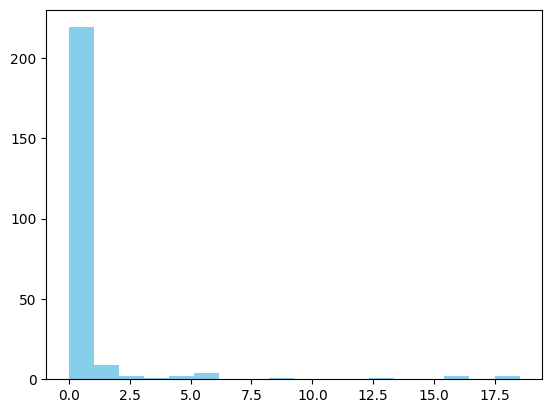

In [22]:
plt.hist(df.cost_rs,bins=18,color = "skyblue",ec='blue')
plt.show()

In [23]:
print("INR/USD factor")
print((df.cost_rs/df.cost_usd).value_counts())

INR/USD factor
0.008333    80
Name: count, dtype: int64


In [24]:
df.drop('cost_usd',axis=1,inplace=True)

In [25]:
#2022 Squads
df['2022_s'].value_counts()

2022_s
MI      28
PBKS    24
CSK     24
RR      24
DC      23
KKR     22
SRH     22
GT      22
LSG     21
RCB     20
Name: count, dtype: int64

In [26]:
print('Year 2023 has '+ str(df.loc[df['2023_s']!='Unsold','2023_s'].count()) + ' and year 2022 had ' + str(df['2022_s'].count()) + ' players')

Year 2023 has 243 and year 2022 had 230 players


## Bivariate Analysis

In [27]:
#lets analyse base price by type
print('\nTOTAL SUM/ PLAYER TYPE')
print(df.groupby('type').agg({'base_price':'sum'}))
print('\nAVG BASE/ PLAYER TYPE')
print(df.groupby('type').agg({'base_price':'mean'}))
print('\nSTD DEV./ PLAYER TYPE')
print(df.groupby('type').agg({'base_price':'std'}))
print('\nCALCULATE Coeff. of Variation')
print(df.groupby('type').agg({'base_price':'std'})/df.groupby('type').agg({'base_price':'mean'}))


TOTAL SUM/ PLAYER TYPE
              base_price
type                    
ALL-ROUNDER        58.45
BATSMAN            28.50
BOWLER             48.35
WICKETKEEPER       21.75

AVG BASE/ PLAYER TYPE
              base_price
type                    
ALL-ROUNDER     0.274413
BATSMAN         0.313187
BOWLER          0.255820
WICKETKEEPER    0.290000

STD DEV./ PLAYER TYPE
              base_price
type                    
ALL-ROUNDER     0.387408
BATSMAN         0.481366
BOWLER          0.344860
WICKETKEEPER    0.411901

CALCULATE Coeff. of Variation
              base_price
type                    
ALL-ROUNDER     1.411770
BATSMAN         1.536993
BOWLER          1.348058
WICKETKEEPER    1.420347


In [28]:
df.groupby('type').agg({'cost_rs':'count'})

,cost_rs
type,
ALL-ROUNDER,87
BATSMAN,41
BOWLER,85
WICKETKEEPER,30


In [29]:
#lets analyse cost price by type

print('\nFor Year 2023\n\n')
print('\nTOTAL SUM COST/ PLAYER TYPE')
print(df.groupby('type').agg({'cost_rs':'sum'}))
print('\nAVG COST/ PLAYER TYPE')
print(df.groupby('type').agg({'cost_rs':'mean'}))
print('\nSTD DEV. COST/ PLAYER TYPE')
print(df.groupby('type').agg({'cost_rs':'std'}))
print('\nCALCULATE Coeff. of Variation')
print(df.groupby('type').agg({'cost_rs':'std'})/df.groupby('type').agg({'cost_rs':'mean'}))


For Year 2023



TOTAL SUM COST/ PLAYER TYPE
              cost_rs
type                 
ALL-ROUNDER     70.75
BATSMAN         36.50
BOWLER          32.15
WICKETKEEPER    27.60

AVG COST/ PLAYER TYPE
               cost_rs
type                  
ALL-ROUNDER   0.813218
BATSMAN       0.890244
BOWLER        0.378235
WICKETKEEPER  0.920000

STD DEV. COST/ PLAYER TYPE
               cost_rs
type                  
ALL-ROUNDER   3.241469
BATSMAN       2.520075
BOWLER        1.041132
WICKETKEEPER  3.023945

CALCULATE Coeff. of Variation
               cost_rs
type                  
ALL-ROUNDER   3.985976
BATSMAN       2.830769
BOWLER        2.752603
WICKETKEEPER  3.286896


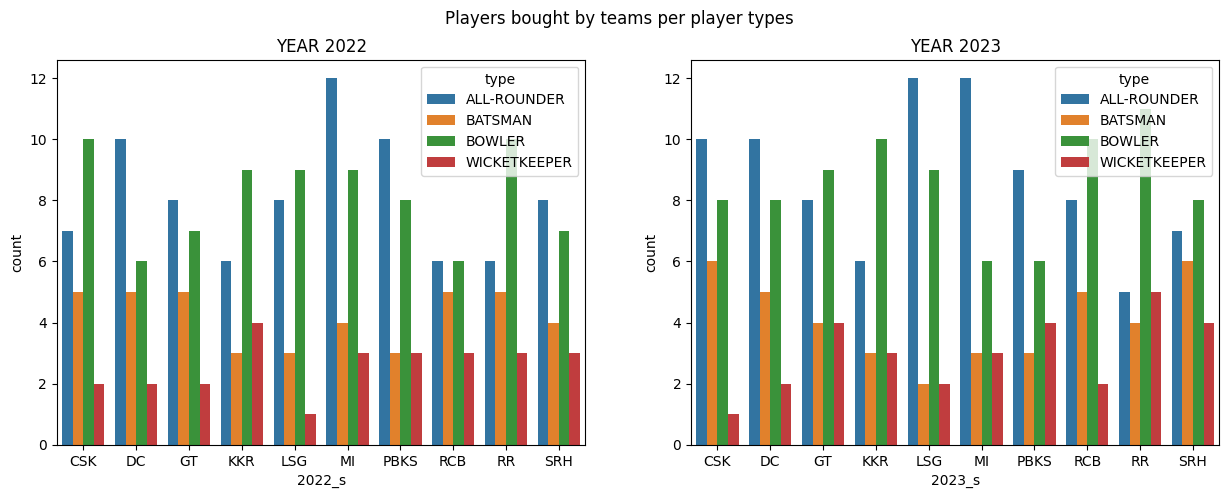

In [31]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Players bought by teams per player types')

tempgroup1 = df.groupby(['type','2022_s']).agg(count=('2022_s','count')).reset_index()
df1 = pd.pivot_table(tempgroup1,values=['2022_s'],columns='type',index='2022_s')
sns.barplot(ax=axes[0],data=tempgroup1, x='2022_s', y='count', hue='type')
axes[0].set_title('YEAR 2022')


tempgroup2 = df.loc[df['2023_s']!='Unsold'].groupby(['type','2023_s']).agg(count=('2023_s','count')).reset_index()
pd.pivot_table(tempgroup2,values=['2023_s'],columns='type',index='2023_s')
sns.barplot(ax=axes[1],data=tempgroup2, x='2023_s', y='count', hue='type')
axes[1].set_title('YEAR 2023')
plt.show()

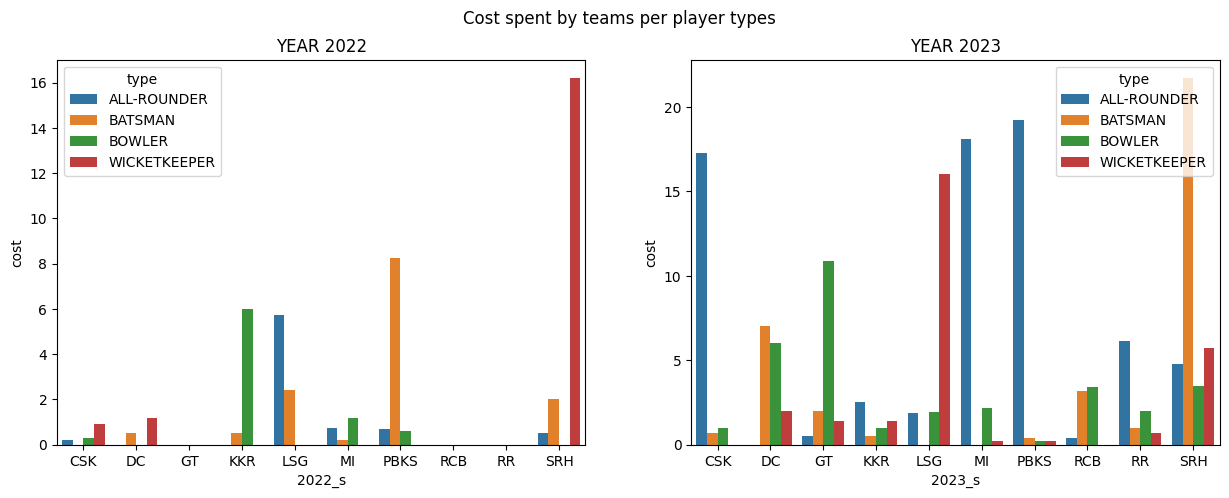

In [32]:
#Lets analyze which team spend more on the players this year
#setting for subplots
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Cost spent by teams per player types')

tempgroup1 = df.groupby(['type','2022_s']).agg(cost=('cost_rs','sum')).reset_index()
sns.barplot(ax=axes[0],data=tempgroup1, x='2022_s', y='cost', hue='type')
axes[0].set_title('YEAR 2022')


tempgroup2 = df.loc[df['2023_s']!='Unsold'].groupby(['type','2023_s']).agg(cost=('cost_rs','sum')).reset_index()
sns.barplot(ax=axes[1],data=tempgroup2, x='2023_s', y='cost', hue='type')
axes[1].set_title('YEAR 2023')
plt.show()